In [1]:
from analysis.effective_connectivity import Subject_Effective_Connectivity
import matplotlib.pyplot as plt
dir = "Results_test/"
name_subject = 'sub-14_logistic_Length-100_Method-RCC'
ROI_Labels = {1: "Node 1", 2: "Node 2"}
ob = Subject_Effective_Connectivity(dir, name_subject, ROI_Labels=ROI_Labels)

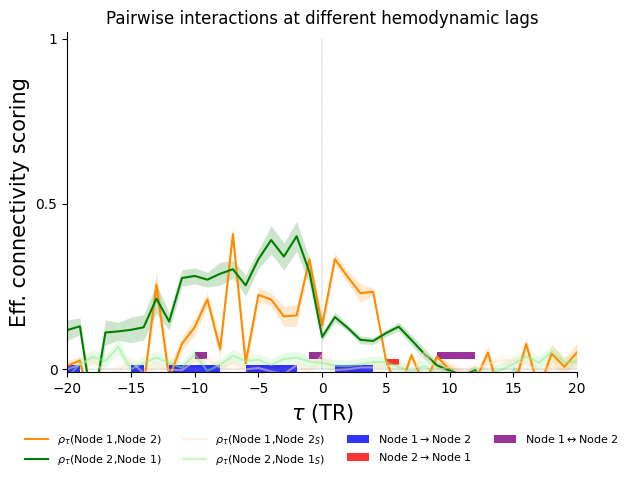

In [2]:
roi_i, roi_j = 1,2
x_label = r"$\tau$ (TR)"
title = "Pairwise interactions at different lags"
ob.plot_interaction_ij(roi_i, roi_j, x_label=x_label, title=title)

In [3]:
Gs, As = ob.Lagged_Networks(weighted=True)

In [4]:
import networkx as nx
nx.get_edge_attributes(Gs[-20], 'weight')

{(1, 2): 0.9962661686166101, (2, 1): 0.0023419586829236507}

In [6]:
As[-20]

array([[0.        , 0.99626617],
       [0.00234196, 0.        ]])

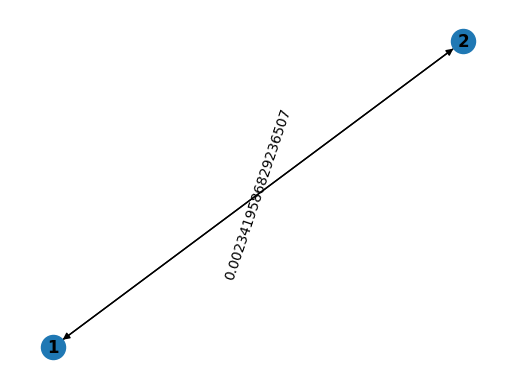

In [9]:
import networkx as nx
pos = nx.spring_layout(Gs[-20])
labels = nx.get_edge_attributes(Gs[-20],'weight')
nx.draw_networkx_edge_labels(Gs[-20], pos, edge_labels=labels)

# Make the graph
nx.draw(Gs[-20], with_labels=True, font_weight="bold", arrows=True)
